## APS Final - Python para Ciência dos Dados

#### Tema: Analysis of Bike Sharing Rental System

Grupo: Felipe Tomé, Marcelo Reis e Victor Habib

#### Link do Drive

https://drive.google.com/file/d/1ODe5HlsELBwbuWq5tL0Y5Nlp8A3RO6u8/view?usp=sharing

##### Objetivo do Projeto

**Introdução:**

Para a APS de Python para Ciência dos Dados foi utilizado o dado "Bike Sharing Systems" da UCI (University California Irvine) Machine Learning Repository. Os anos de de análise foram 2011 e 2012. E a cidade de observação é Washington, DC.

**Pergunta:**

<h5> Prever quantas bicicletas são alugadas em um dia, baseado nas condições climáticas e adversas (como a data, se é feriado, etc), pela população estadunidense. </h5>

A partir desse questionamento, foi feito um estudo aprofundado de análise exploratória de dados que nos ajudarão a identificar padrões para formular conclusões. Em seguida, foi realizado um modelo de regressão para a previsão desse aluguel baseado nas condições identificadas.



##### Atalhos do Jupyter Lab

* Setas para se deslocar
* ENTER para editar a célula
* ESC para sair do modo de edição
* CTRL + ENTER para executar a célula
* SHIFT + ENTER executa e cria uma célula abaixo
* Delete, Cut, Copy e Paste: DD, X, C e V
* Cria célula acima (above) e abaixo (bellow): A e B
* Código ou Markdown: Y ou M
* Divide célula: CTRL + SHIFT + " - "
* Junta (merge) células: SHIFT + M
* Interrompe o kernel: I I
* SHIFT + TAB dá a assinatura da função
* Exemplo de acesso à documentação: pd.merge?

##### Variables:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

## Análise Exploratória

**Inicialização:**
Importar, ler e organizar os dados em DataFrames que serão utilizados durante o estudo.

In [1]:
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from siuba import *
from plotnine import *
from scipy.stats import iqr

%matplotlib inline

In [2]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

#print(dados)

In [3]:
(df_day>>
     select(-_.instant)>>
     head())

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


** Obs: Dado não está em formato tidy: temos variável tipo de usuário espalhada por duas colunas (registered e casual)**

In [4]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#Organizando

df_day['weathersit'] = df_day['weathersit'].replace([1,2,3,4],["Good", "Moderate", "Bad", "Very Bad"])
df_day['weekday'] = df_day['weekday'].replace([0,1,2,3,4,5,6],["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
df_day['season'] = df_day['season'].replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"])
df_day['workingday'] = df_day['workingday'].replace([0,1],["No","Yes"])
df_day['holiday'] = df_day['holiday'].replace([0,1],["No", "Yes"])
df_day['yr'] = df_day['yr'].replace([0,1],[2011, 2012])
df_day['mnth'] = df_day['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])

In [105]:
#Transformando em tidy

df_day_tidy = (df_day >>
     gather("user", "rents", "casual", "registered"))

df_hour_tidy = (df_hour >>
     gather("user", "rents", "casual", "registered"))

df_hour_tidy.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,user,rents
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,casual,3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,casual,8
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,casual,5
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,casual,3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,casual,0


## ADAPTAR DEPOIS PARA DADOS TIDY

** Primeiro entendendo individualmente as variáveis**

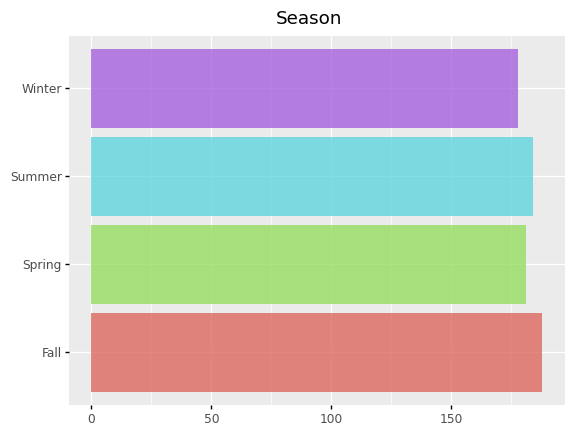

<ggplot: (-9223371893590899838)>

In [20]:
(df_day >>
     ggplot(aes("season", fill = "season"))+
        geom_bar(alpha = 0.75)+
        labs(x = "", y = "", title = "Season")+
        theme(legend_position = "none")+
        coord_flip())

Mais dias de outono? **Muito estranho**

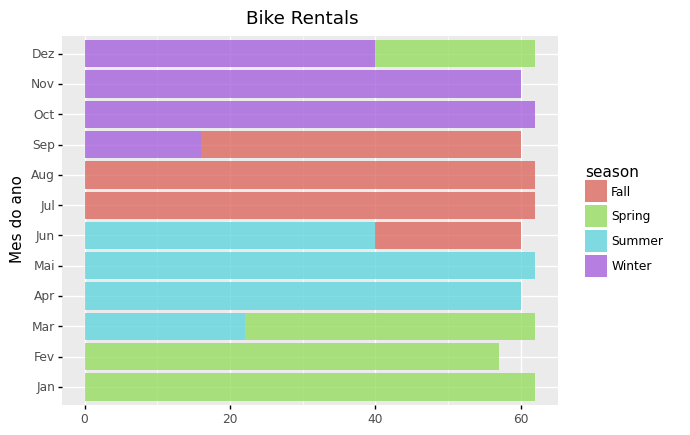

<ggplot: (-9223371878211504289)>

In [80]:
(df_day >>
     mutate(mnth = pd.Categorical(df_day["mnth"], categories = ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])) >> # não sei porque, mas n funfou
     ggplot(aes("mnth", fill = "season"))+
        geom_bar(alpha = 0.75)+
        labs(x = "Mes do ano", y = "", title = "Bike Rentals")+
        #theme(legend_position = "none")+
        coord_flip())

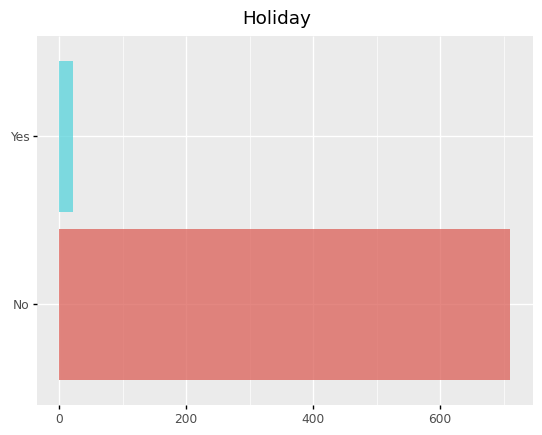

<ggplot: (143254822383)>

In [10]:
(df_day >>
     ggplot(aes("holiday", fill = "holiday"))+
        geom_bar(alpha = 0.75)+
        labs(x = "", y = "", title = "Holiday")+
        theme(legend_position = "none")+
        coord_flip())

Os alugueis em feriado são menores. Mas isso deve-se ao fato de haverem muito menos feriados. Uma análise válida para se fazer mais adiante é se de fato, considerando a "conversão diária nesses dias",  esse dado se mantem?!

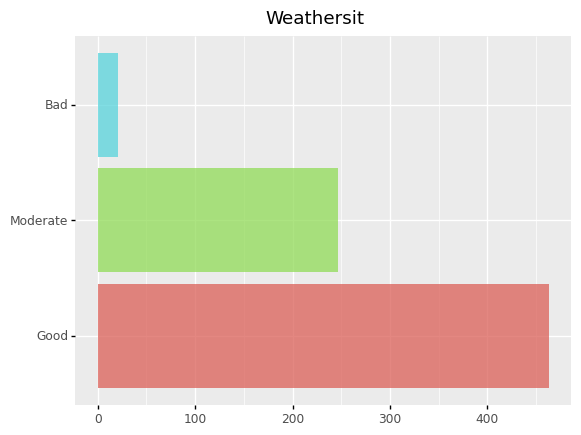

<ggplot: (143266985487)>

In [24]:
(df_day >>
     mutate(weathersit = pd.Categorical(df_day["weathersit"], categories =  ["Good", "Moderate", "Bad", "Very Bad"])) >>   
     ggplot(aes("weathersit", fill = "weathersit"))+
        geom_bar(alpha = 0.75)+
        labs(x = "", y = "", title = "Weathersit")+
        theme(legend_position = "none")+
        coord_flip())

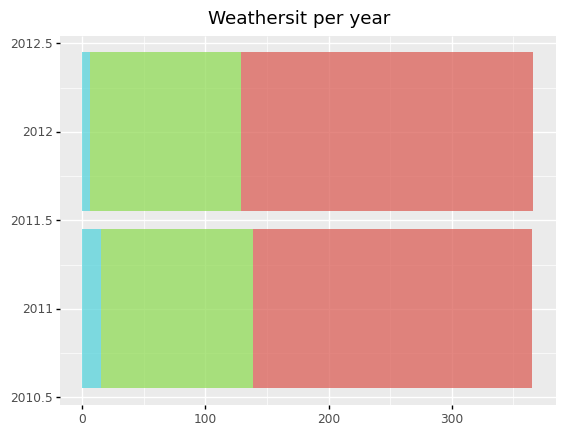

<ggplot: (-9223371893588115782)>

In [25]:
(df_day >>
     mutate(weathersit = pd.Categorical(df_day["weathersit"], categories =  ["Good", "Moderate", "Bad", "Very Bad"])) >>   
     ggplot(aes("yr", fill = "weathersit"))+
        geom_bar(alpha = 0.75)+
        labs(x = "", y = "", title = "Weathersit per year")+
        theme(legend_position = "none")+
        coord_flip())

Mais dias ruins em 2011 e mais dias bons em 2012

Quando o dia foi ruim, quem geralmente aluga? Que horas?

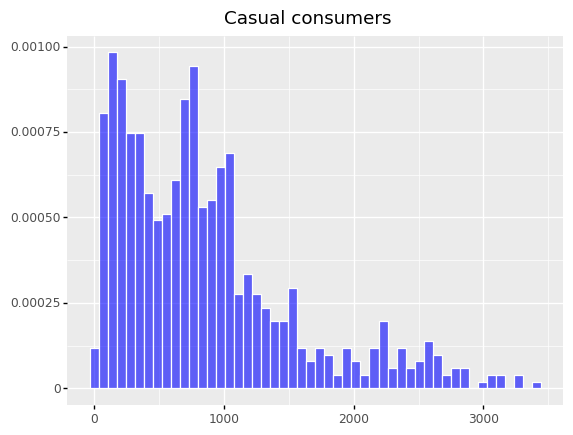

<ggplot: (-9223371893587791963)>

In [26]:
(df_day >>
     ggplot(aes("casual", y = "stat(density)"))+
        geom_histogram(bins = 50, fill = "blue", color = "white", alpha = 0.6)+
        labs(x = "", y = "", title = "Casual consumers")+
        theme(legend_position = "none"))

Geralmente há mais casual consumers em dias com baixa contagem. Histograma assimetrico para a esquerda.

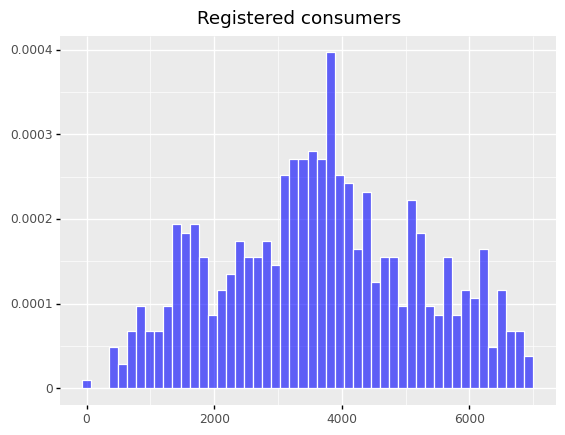

<ggplot: (-9223371893587570053)>

In [27]:
(df_day >>
     ggplot(aes("registered", y = "stat(density)"))+
        geom_histogram(bins = 50, fill = "blue", color = "white", alpha = 0.6)+
        labs(x = "", y = "", title = "Registered consumers")+
        theme(legend_position = "none"))

Distribuição proxiam a uma normal em relação aos consumidores registrados

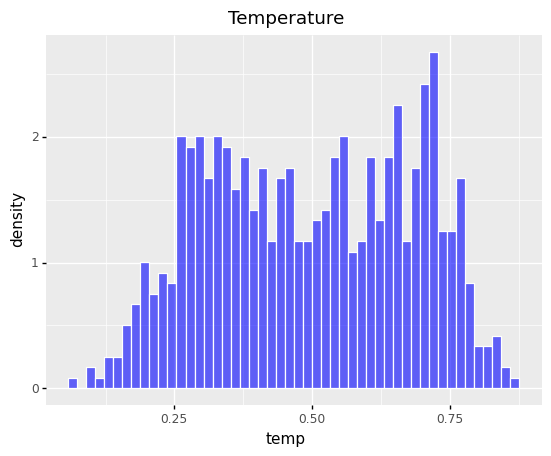

<ggplot: (-9223371893591202763)>

In [15]:
(df_day >>
     ggplot(aes("temp", y = "stat(density)"))+
        geom_histogram(bins = 50, fill = "blue", color = "white", alpha = 0.6)+
        labs(title = "Temperature")+
        theme(legend_position = "none"))

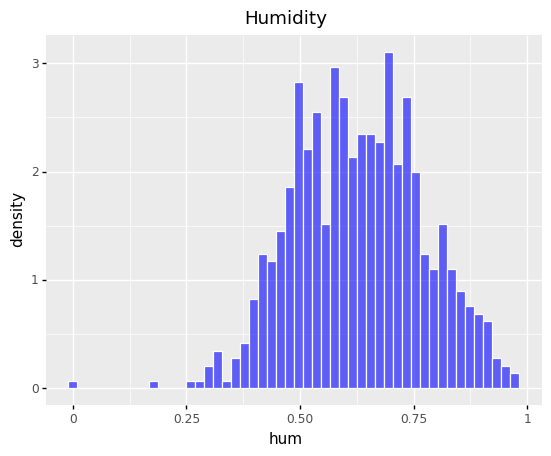

<ggplot: (143263556223)>

In [16]:
(df_day >>
     ggplot(aes("hum", y = "stat(density)"))+
        geom_histogram(bins = 50, fill = "blue", color = "white", alpha = 0.6)+
        labs(title = "Humidity")+
        theme(legend_position = "none"))

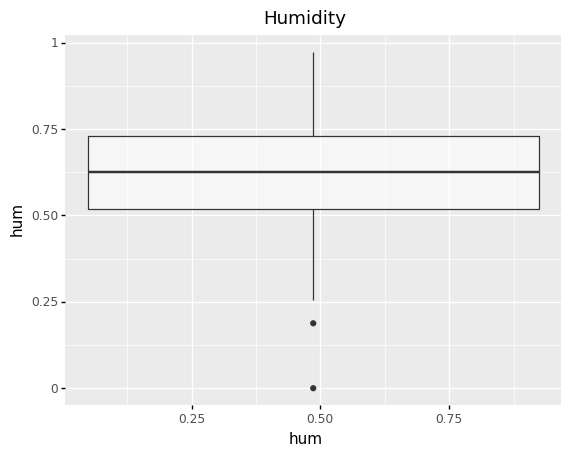

<ggplot: (-9223371893591180449)>

In [17]:
(df_day >>
     ggplot(aes("hum","hum"))+
        geom_boxplot(alpha = 0.6)+
        labs(title = "Humidity")+
        theme(legend_position = "none"))

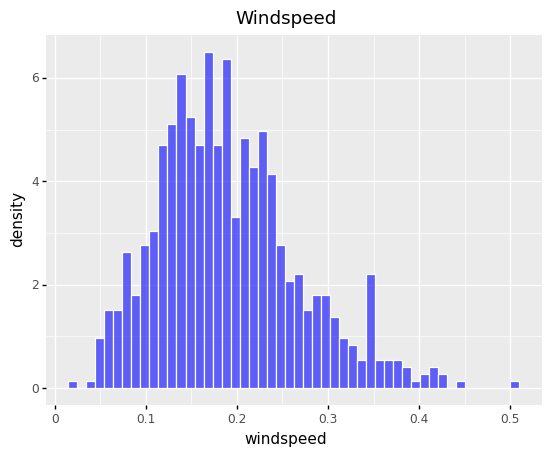

<ggplot: (-9223371893591219505)>

In [18]:
(df_day >>
     ggplot(aes("windspeed", y = "stat(density)"))+
        geom_histogram(bins = 50, fill = "blue", color = "white", alpha = 0.6)+
        labs(title = "Windspeed")+
        theme(legend_position = "none"))

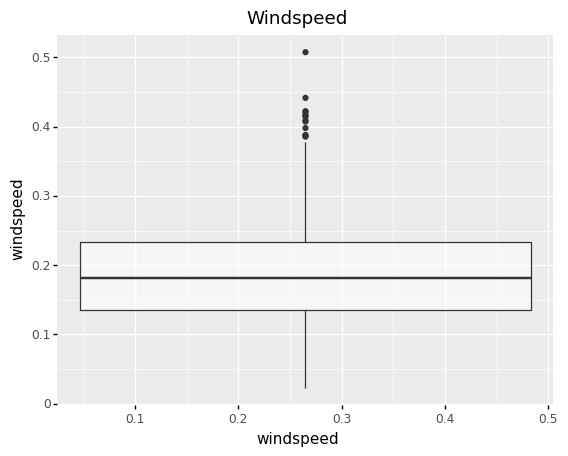

<ggplot: (143263556188)>

In [19]:
(df_day >>
     ggplot(aes("windspeed","windspeed"))+
        geom_boxplot(alpha = 0.6)+
        labs(title = "Windspeed")+
        theme(legend_position = "none"))

** Agora fazendo relações entre as variáveis mais interessantes** <h3>Fazer esses gráficos! </h3>

- Contagem em holidays eh maior? mais casuals ou registrados? FEITO
- Contagem em meses do ano? FEITO Ferias influenciam? TENTAR ENTENDER AINDA
- Contagem em temperatura/clima? FEITO
- Tendencia casuals e registrados? FEITO
- Quais ftores influenciam mais? Working day ou mais lazer? FEITO clima ou temperatura? FEITO
- Geralmemnte prefere usar mais bike como meio de transporte ou meio de passeio? lazer x trabalho (ver contagem em dias da semana sem feriado x feriados e fds) FEITO
- Estação ou usuários por horário


## AQUI JA ESTAMOS USANDO OS TIDY

## Contagem em feriados

In [6]:
(df_day >>
     group_by(_.holiday)>>
     summarize(mean_holiday = _.cnt.mean()))

,holiday,mean_holiday
0,No,4527.104225
1,Yes,3735.000000


In [43]:
(df_day_tidy>>
     group_by( _.holiday,  _.user)>>
     summarize(mean_holiday = _.rents.mean()))

,holiday,user,mean_holiday
0,No,casual,841.771831
1,No,registered,3685.332394
2,Yes,casual,1064.714286
3,Yes,registered,2670.285714


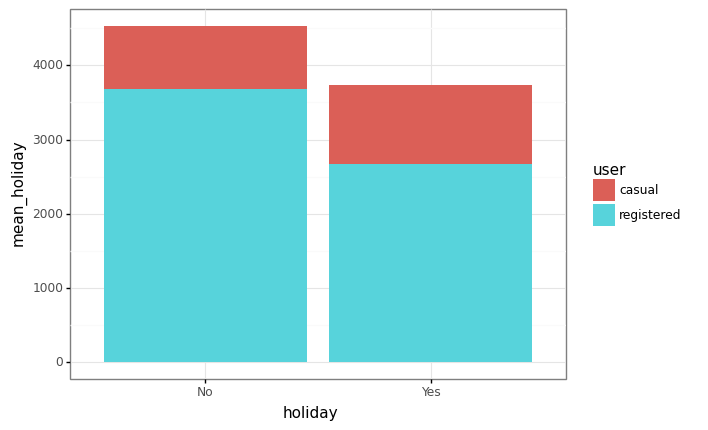

<ggplot: (-9223371878210988628)>

In [50]:
(df_day_tidy>>
     group_by( _.holiday,  _.user)>>
     summarize(mean_holiday = _.rents.mean())>>
     ggplot(aes("holiday", "mean_holiday", fill = "user"))+
        geom_bar(stat = "identity")+
        theme_bw())

Casuals alugam mais em feriado quando comparado aos registrados que alugam bem menos em feriados.

Isso deve-se ao fato de que os registrados provavelmnete usam a bicileta como meio de transporte e não de lazer.

## Alugueis ao longo do tempo

In [37]:
(df_day_tidy >>
     mutate(mnth = pd.Categorical(df_day_tidy["mnth"], categories =  ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])) >>
     group_by(_.mnth, _.yr, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     head())

,mnth,yr,user,mean_cnt
0,Jan,2011,casual,99.129032
1,Jan,2011,registered,1132.774194
2,Jan,2012,casual,289.322581
3,Jan,2012,registered,2831.451613
4,Fev,2011,casual,222.928571


C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


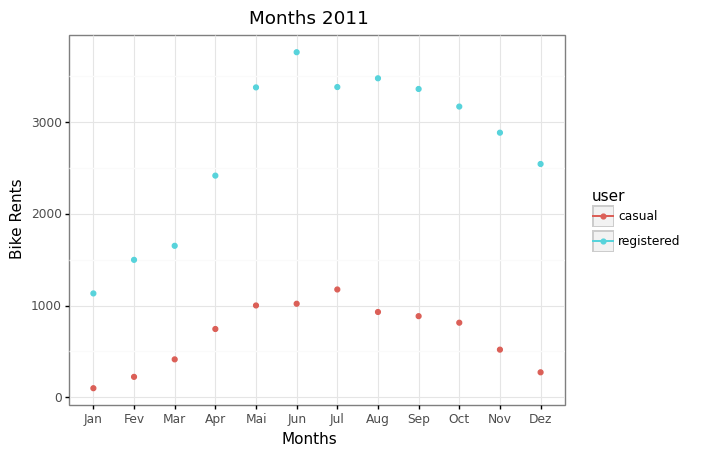

<ggplot: (158644555058)>

In [77]:
(df_day_tidy >>
     mutate(mnth = pd.Categorical(df_day_tidy["mnth"], categories =  ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])) >>
     filter(_.yr == 2011)>>
     group_by(_.mnth, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("mnth", "mean_cnt", color = "user"))+
        geom_line(size = 0.75)+ #N SEI PQ NAO ESTA FUNFANDO????????????
        geom_point(size = 1.5)+
        labs(x = "Months", y = "Bike Rents", title = "Months 2011")+
        theme_bw())

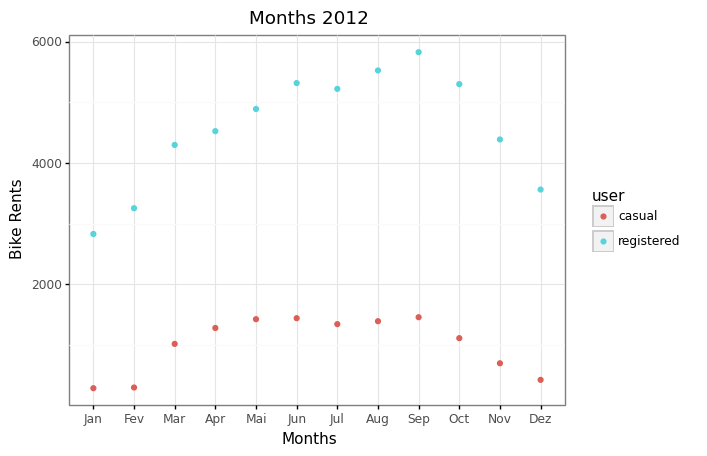

<ggplot: (-9223371878333022204)>

In [91]:
(df_day_tidy >>
     mutate(mnth = pd.Categorical(df_day_tidy["mnth"], categories =  ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])) >>
     filter(_.yr == 2012)>>
     group_by(_.mnth, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("mnth", "mean_cnt", color = "user"))+
        #geom_line(size = 0.75)+ #N SEI PQ NAO ESTA FUNFANDO????????????
        geom_point(size = 1.5)+
        labs(x = "Months", y = "Bike Rents", title = "Months 2012")+
        theme_bw())

In [82]:
(df_day_tidy >>
     group_by(_.yr, _.user)>>
     summarize(mean_cnt = _.rents.mean()))

,yr,user,mean_cnt
0,2011,casual,677.402740
1,2011,registered,2728.358904
2,2012,casual,1018.483607
3,2012,registered,4581.450820


C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


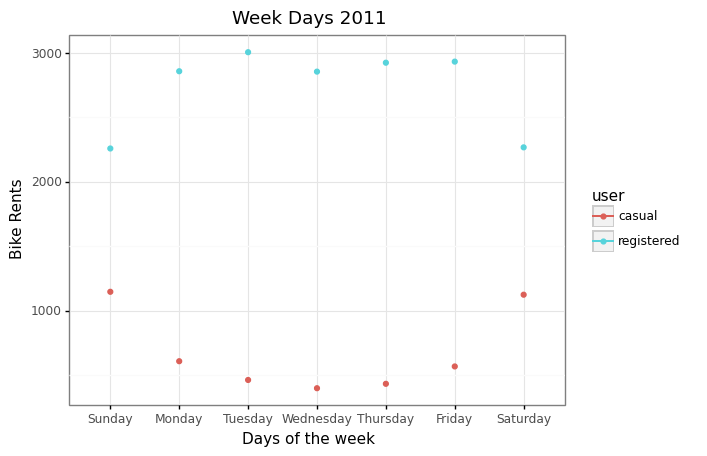

<ggplot: (158643971704)>

In [76]:
(df_day_tidy >>
     mutate(weekday = pd.Categorical(df_day_tidy["weekday"], categories =  ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])) >>
     filter(_.yr == 2011)>>
     group_by(_.weekday, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("weekday", "mean_cnt", color = "user"))+
        geom_line(size = 0.75)+ #N SEI PQ NAO ESTA FUNFANDO????????????
        geom_point(size = 1.5)+
        labs(x = "Days of the week", y = "Bike Rents", title = "Week Days 2011")+
        theme_bw())

C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


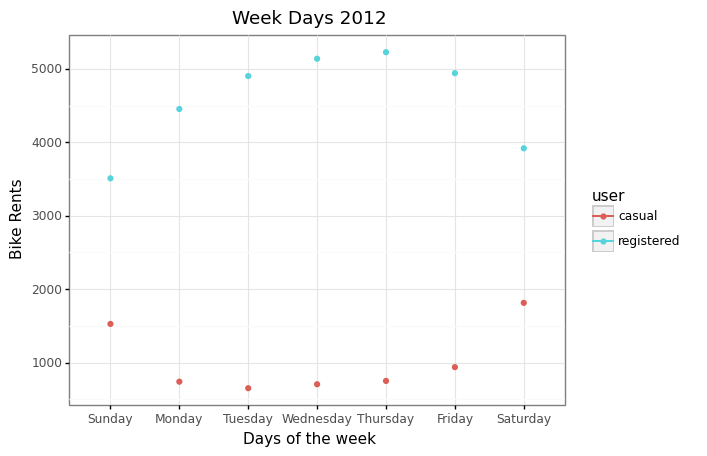

<ggplot: (-9223371878333708884)>

In [85]:
(df_day_tidy >>
     mutate(weekday = pd.Categorical(df_day_tidy["weekday"], categories =  ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])) >>
     filter(_.yr == 2012)>>
     group_by(_.weekday, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("weekday", "mean_cnt", color = "user"))+
        geom_line(size = 0.75)+ #N SEI PQ NAO ESTA FUNFANDO????????????
        geom_point(size = 1.5)+
        labs(x = "Days of the week", y = "Bike Rents", title = "Week Days 2012")+
        theme_bw())

C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


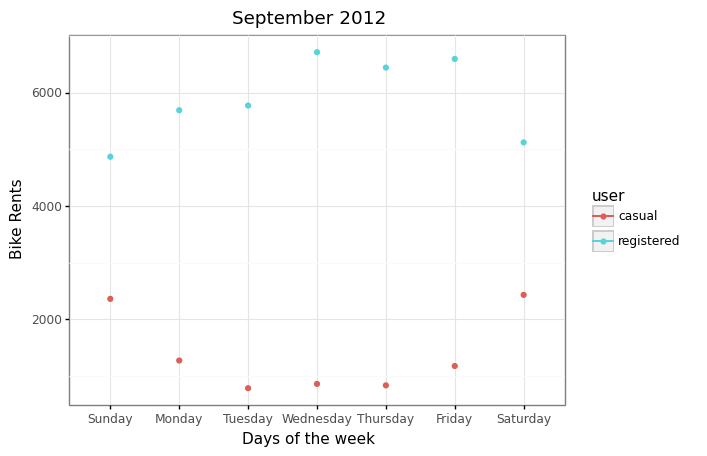

<ggplot: (-9223371878209739439)>

In [79]:
(df_day_tidy >>
     mutate(weekday = pd.Categorical(df_day_tidy["weekday"], categories =  ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])) >>
     filter(_.yr == 2012, _.mnth == "Sep")>>
     group_by(_.weekday, _.user)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("weekday", "mean_cnt", color = "user"))+
        geom_line(size = 0.75)+ #N SEI PQ NAO ESTA FUNFANDO????????????
        geom_point(size = 1.5)+
        labs(x = "Days of the week", y = "Bike Rents", title = "September 2012")+
        theme_bw())

# EM TODOS ESSES MAPAS DE TEMPO, QUERO TENTAR JUNTAR OS DOIS ANOS EM UM MESMO GRÁFICO AO INVÉS DE FAZER GRÁFICOS SEPARADOS! SE ALGUEM CONSEGUIR IA SER TOP!

# ADICIONAR TB A LINHA NO GRAFICO

## Usuarios nas condições climaticas

C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\stats\stat_smooth.py:202: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


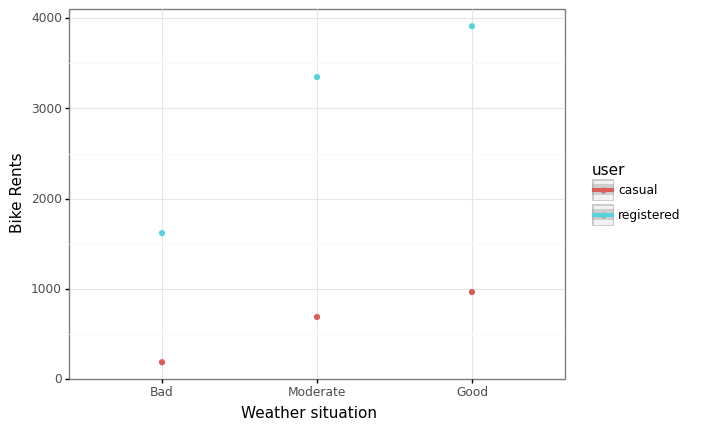

<ggplot: (-9223371878333677866)>

In [102]:
(df_day_tidy >>
     mutate(weathersit = pd.Categorical(df_day_tidy["weathersit"], categories =  ["Very Bad", "Bad", "Moderate", "Good" ])) >>
     group_by(_.user, _.weathersit)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("weathersit", "mean_cnt", color = "user"))+
        geom_point(size = 1.5)+
        geom_smooth()+ ##PQ TB N ESTA FUNFANDO????
        labs(x = "Weather situation", y = "Bike Rents")+
        theme_bw())

C:\Users\marce\AppData\Roaming\Python\Python36\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


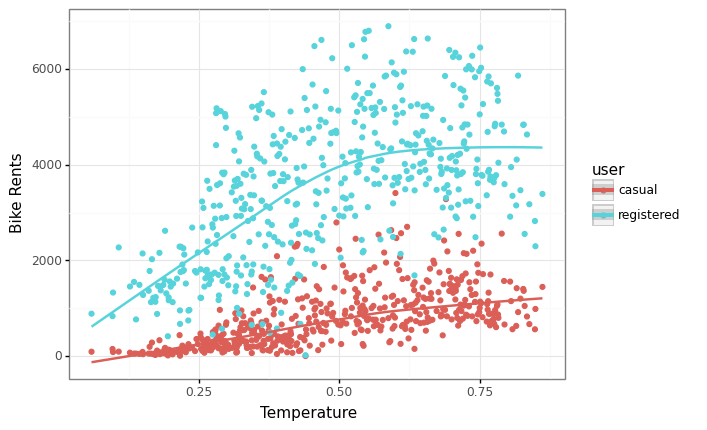

<ggplot: (158520740279)>

In [104]:
(df_day_tidy >>
     group_by(_.user, _.temp)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("temp", "mean_cnt", color = "user"))+
        geom_point(size = 1.5)+
        geom_smooth()+ 
        labs(x = "Temperature", y = "Bike Rents")+
        theme_bw())

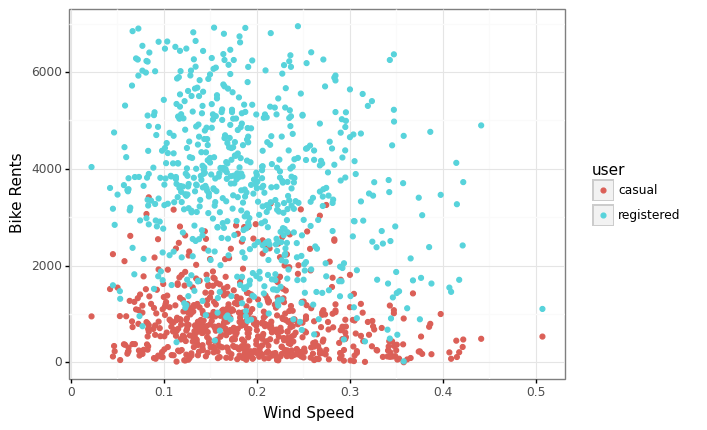

<ggplot: (158521274025)>

In [95]:
(df_day_tidy >>
     group_by(_.user, _.windspeed)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("windspeed", "mean_cnt", color = "user"))+
        geom_point(size = 1.5)+
        #geom_smooth()+ 
        labs(x = "Wind Speed", y = "Bike Rents")+
        theme_bw())

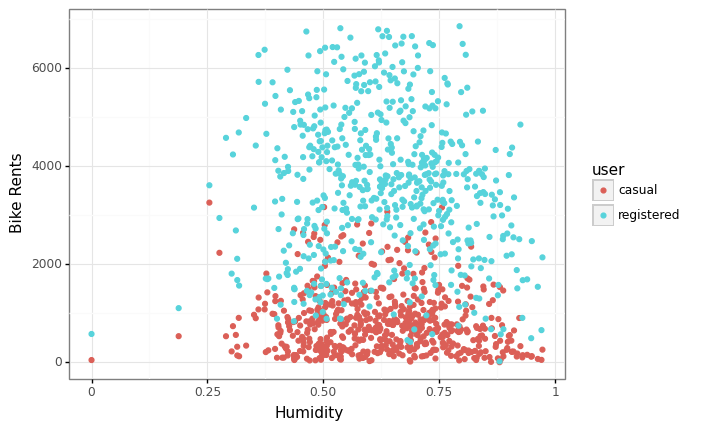

<ggplot: (-9223371878333708828)>

In [96]:
(df_day_tidy >>
     group_by(_.user, _.hum)>>
     summarize(mean_cnt = _.rents.mean())>>
     ggplot(aes("hum", "mean_cnt", color = "user"))+
        geom_point(size = 1.5)+
        #geom_smooth()+ 
        labs(x = "Humidity", y = "Bike Rents")+
        theme_bw())

## Analise por horário do dia

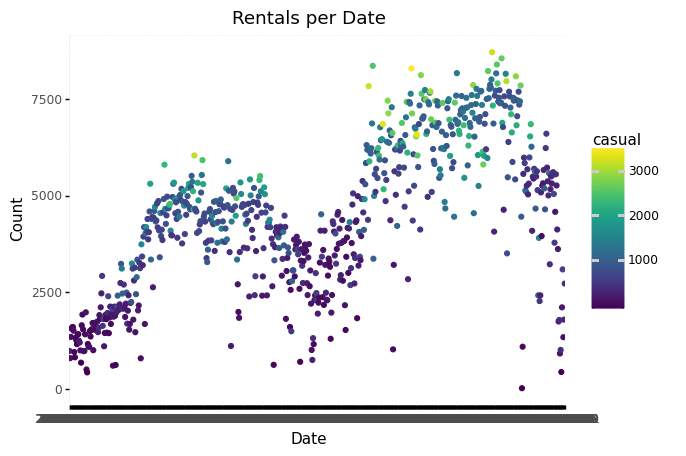

<ggplot: (-9223371878210461948)>

In [81]:
p = ggplot(aes(x='dteday', y='cnt'), df_day)
p + geom_point(aes(color='casual')) + labs(x = "Date", y = "Count") + ggtitle("Rentals per Date")

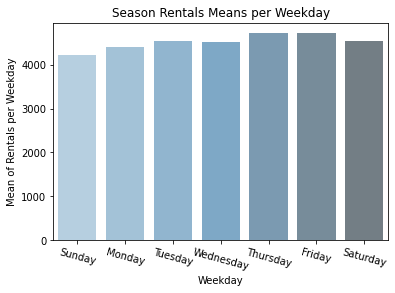

In [11]:
df_day_week = (df_day >>
     filter(_.holiday == "No") >>
     group_by(_.weekday) >>
     summarize(total = _.cnt.mean()) >>
     arrange(_.total))

ax = sns.barplot(x = "weekday", y = "total", data = df_day_week, errwidth = 0, alpha = 0.7,
                order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette="Blues_d")
ax.set(xlabel = "Weekday", ylabel = "Mean of Rentals per Weekday", title = "Season Rentals Means per Weekday");

for item in ax.get_xticklabels():
    item.set_rotation(-15)

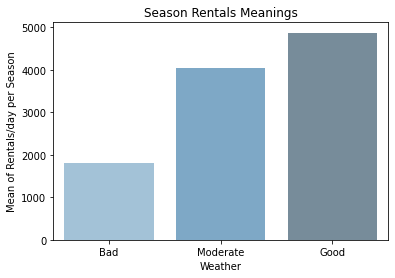

In [12]:
df_day_seasons = (df_day >>
     group_by(_.weathersit) >>
     summarize(total = _.cnt.mean()) >>
     arrange(_.total))

ax = sns.barplot(x = "weathersit", y = "total", data = df_day_seasons, errwidth = 0, alpha = 0.7, palette="Blues_d")
ax.set(xlabel = "Weather", ylabel = "Mean of Rentals/day per Season", title = "Season Rentals Meanings");

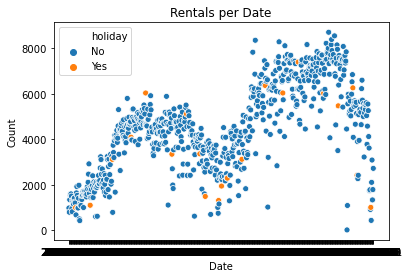

In [173]:
ax = sns.scatterplot(x = "dteday", y = "cnt", data = df_day, hue = "holiday")
ax.set(xlabel = "Date", ylabel = "Count", title = "Rentals per Date");

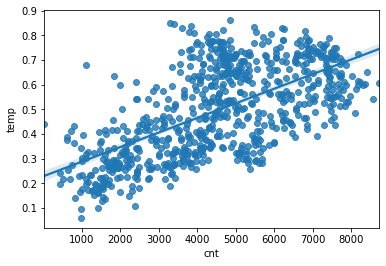

In [134]:
ax = sns.regplot(data=df_day, x="cnt", y="temp")

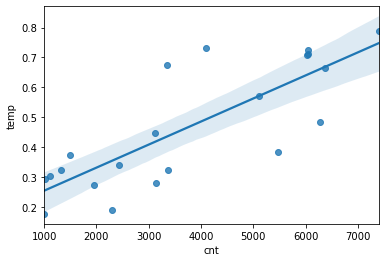

In [144]:
df_holiday = (df_day >>
     filter(_.holiday == "Yes"))
              
ax = sns.regplot(data=df_holiday, x="cnt", y="temp")

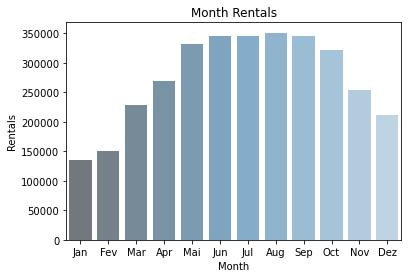

In [217]:
df_month = (df_day >>
     select(_.mnth, _.season, _.cnt) >>
     group_by(_.mnth) >>
     summarize(total = _.cnt.sum()))

ax = sns.barplot(x = "mnth", y = "total", data = df_month, errwidth = 0, alpha = 0.7,
                order = ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"], palette = "Blues_d")
ax.set(xlabel = "Month", ylabel = "Rentals", title = "Month Rentals");

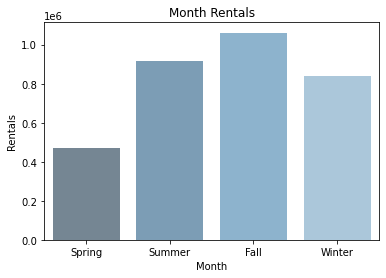

In [219]:
df_season = (df_day >>
     select(_.mnth, _.season, _.cnt) >>
     group_by(_.season) >>
     summarize(total = _.cnt.sum()))

ax = sns.barplot(x = "season", y = "total", data = df_season, errwidth = 0, alpha = 0.7,
                order = ["Spring", "Summer", "Fall", "Winter"], palette = "Blues_d")
ax.set(xlabel = "Month", ylabel = "Rentals", title = "Month Rentals");

In [ ]:
(df_day >>
     mutate(cut = pd.Categorical(df_day["mnth"], categories = ["Jan", "Fev", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])) >> # não sei porque, mas n funfou
     ggplot(aes("mnth", fill = "season"))+
        geom_bar(alpha = 0.75)+
        labs(x = "Mes do ano", y = "", title = "Bike Rentals")+
        theme(legend_position = "none")+
        coord_flip())

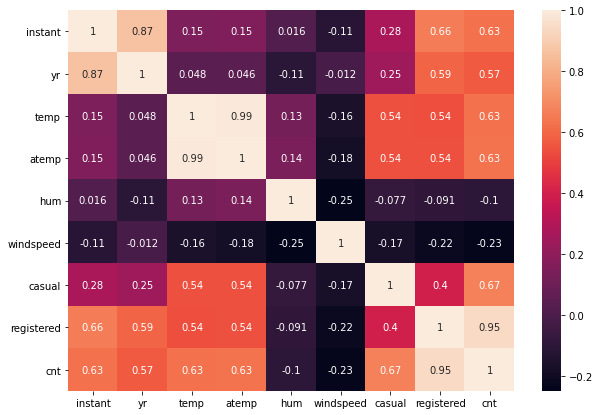

In [22]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(df_day.corr(), annot = True)
plt.show()

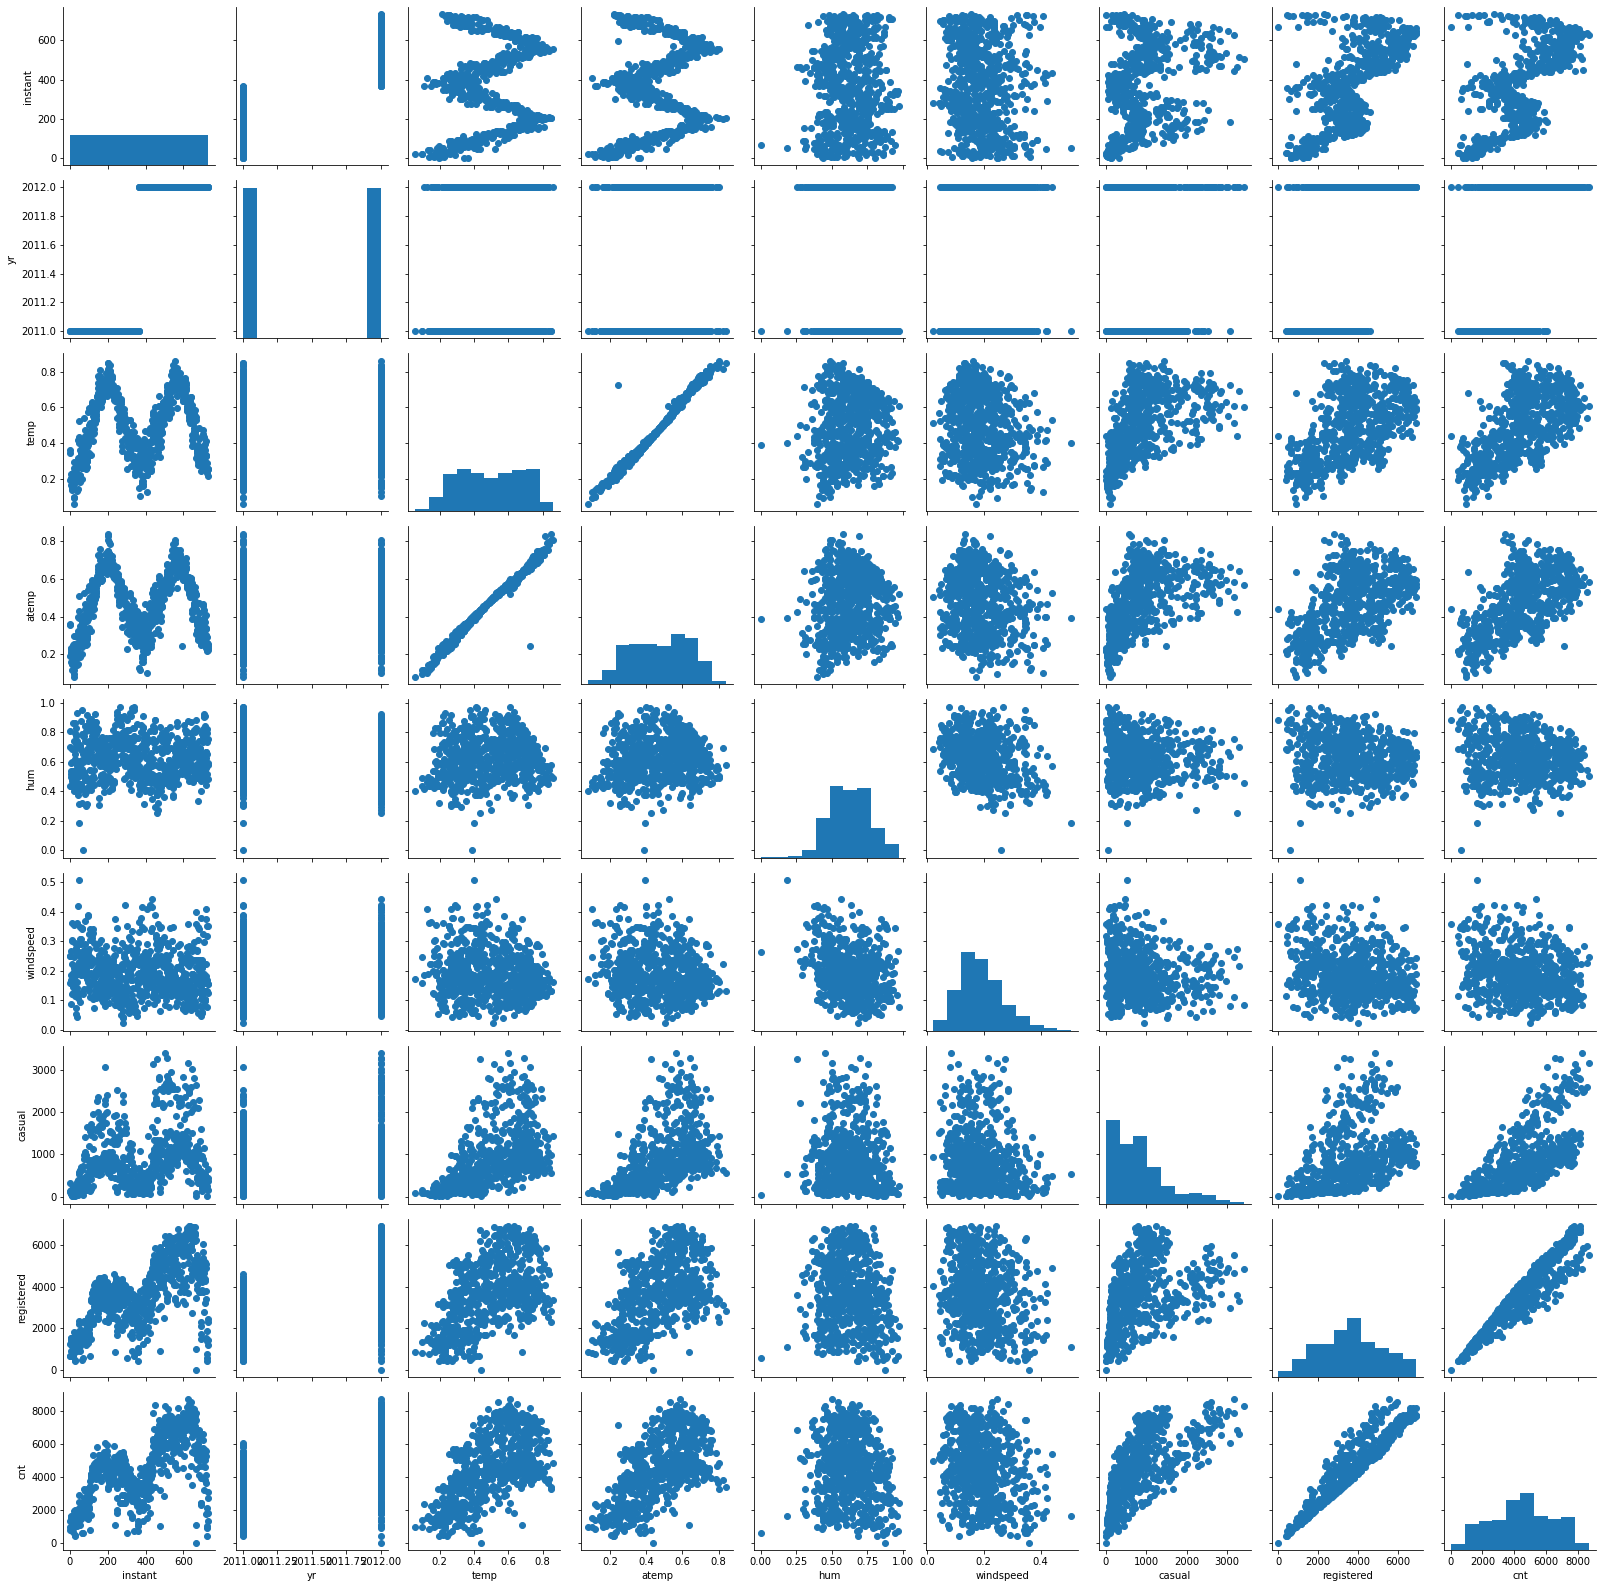

In [23]:
g = sns.PairGrid(df_day)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.show()